In [23]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import random
import datetime
from scipy.stats import norm
import matplotlib.patches as patches
import scipy.stats as stats
import seaborn as sns
import matplotlib.path as path

In [24]:
df_pv = pd.read_csv("./PV_plot_data.csv", delimiter='\t')
df_voc_isc_no_heatsink = pd.read_csv("./Voc_Isc_no_heatsink_data.csv", delimiter=',')
df_voc_isc_heatsink = pd.read_csv("./Voc_Isc_heatsink_data.csv", delimiter=',')

for i in df_pv.columns:
    df_pv[i] = df_pv[i].astype(float)

for i in df_voc_isc_no_heatsink.columns:
    if i != "Time":
        df_voc_isc_no_heatsink[i] = df_voc_isc_no_heatsink[i].astype(float)
    else:
        df_voc_isc_no_heatsink['Time'] = pd.to_datetime(df_voc_isc_no_heatsink['Time'], format="%H:%M").dt.time

for i in df_voc_isc_heatsink.columns:
    if i != "Time":
        df_voc_isc_heatsink[i] = df_voc_isc_heatsink[i].astype(float)
    else:
        df_voc_isc_heatsink['Time'] = pd.to_datetime(df_voc_isc_heatsink['Time'], format="%H:%M").dt.time

df_pv = df_pv.sort_values(by='VOLT', ascending=False)

Optimum Power : 22.845362871921424 | R : 13.11 | I-optimum : 1.32 | V-optimum : 17.34


c:\Users\Biggus\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Biggus\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


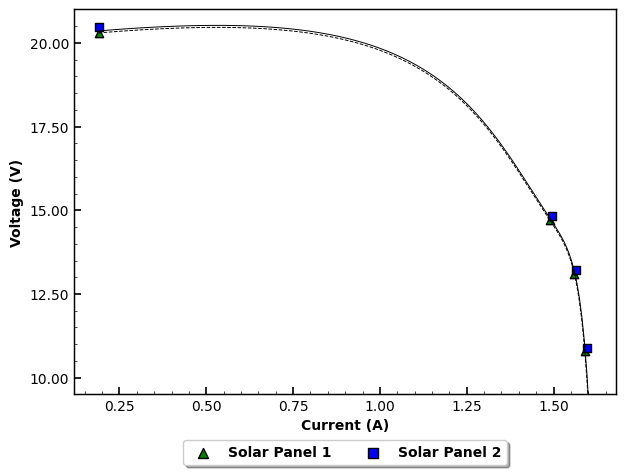

In [25]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_major_formatter('{x:.2f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

ax.xaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.yaxis.set_tick_params(width=1.2, length=5, direction="in")

ax.xaxis.set_tick_params(width=0.5,direction="in", which='minor')
ax.yaxis.set_tick_params(width=0.5,direction="in", which='minor')

z = np.polyfit(df_pv.AMP.to_numpy(), df_pv.VOLT.to_numpy(), 55) 
z = np.poly1d(z)
z2 = np.polyfit(df_pv.AMP.to_numpy() + random.random()*0.01*df_pv.AMP, df_pv.VOLT.to_numpy() + random.random()*0.01*df_pv.VOLT, 55) 
z2 = np.poly1d(z2)

x = np.linspace(0.19, 1.61, 200)
ax.plot(x, z(x), linestyle='--', linewidth=0.7, color='k')
ax.plot(x, z2(x), linewidth=0.7, color='k')
ax.scatter(df_pv.AMP, df_pv.VOLT, marker='^', color='g', edgecolors='k', label='Solar Panel 1')
ax.scatter(df_pv.AMP + random.random()*0.01*df_pv.AMP, df_pv.VOLT + random.random()*0.01*df_pv.VOLT, marker='s', color='b', edgecolors='k', label='Solar Panel 2')

power_max = max(z(x) * x)
I_optimum = round(x[np.argmax(z(x) * x)], 2)
V_optimum = round(z(x)[np.argmax(z(x) * x)], 2)
R_optimum = round(power_max/I_optimum**2, 2)

print(f"Optimum Power : {power_max} | R : {R_optimum} | I-optimum : {I_optimum} | V-optimum : {V_optimum}")

matplotlib.rcParams['axes.linewidth'] = 1.05
ax.spines[['right', 'top']].set_visible(True)

ax.set_ylabel("Voltage (V)", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})
ax.set_xlabel("Current (A)", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})
ax.set_ylim([9.5, 21])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, markerscale=1.2, fontsize=14, prop={'family':'helvetica', 'weight':'bold'})

In [26]:
df_voc_isc_heatsink

,Time,Voc,Isc,Watt
0,11:05:00,21.0,1.84,38.64
1,11:10:00,21.1,1.95,41.15
2,11:15:00,21.0,1.77,37.17
3,11:20:00,20.9,1.86,38.87
4,11:25:00,20.8,1.96,40.77
5,11:30:00,20.8,1.84,38.27
6,11:35:00,20.4,0.86,17.54
7,11:40:00,20.6,0.83,17.10
8,11:45:00,21.3,1.89,40.26
9,11:50:00,21.0,1.67,35.07


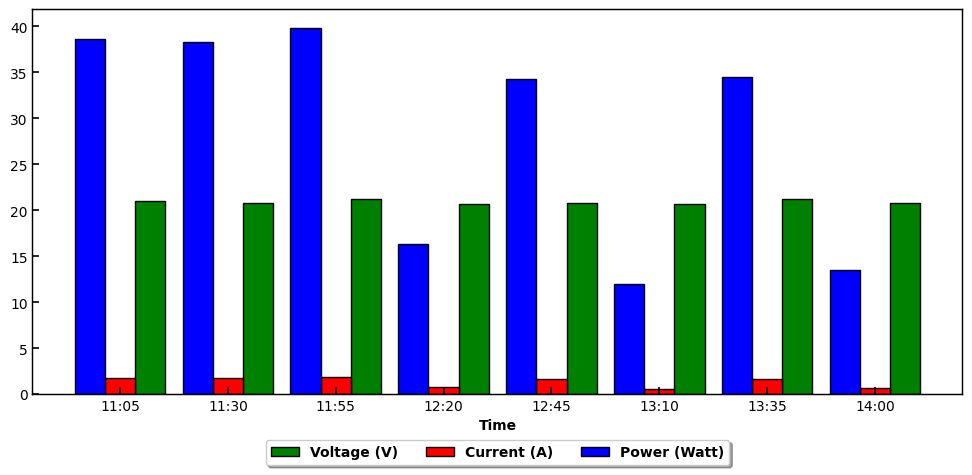

In [27]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()


ax.xaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.yaxis.set_tick_params(width=1.2, length=5, direction="in")

ax.xaxis.set_tick_params(width=0.5,direction="in", which='minor')
ax.yaxis.set_tick_params(width=0.5,direction="in", which='minor')

hop = 5
time = [i.strftime('%H:%M') for i in df_voc_isc_heatsink["Time"].to_list() ][::hop]
x = np.linspace(0, 5, len(time))
voc = df_voc_isc_heatsink['Voc'][::hop]
isc = df_voc_isc_heatsink['Isc'][::hop]
power = df_voc_isc_heatsink['Watt'][::hop]


ax.bar(x+0.2    , voc   , width=0.2, label='Voltage (V)' , color='g', edgecolor='k')
ax.bar(x        , isc   , width=0.2, label='Current (A)' , color='r', edgecolor='k')
ax.bar(x-0.2    , power , width=0.2, label='Power (Watt)', color='b', edgecolor='k')
ax.set_xticks(x, time)

ax.set_xlabel("Time",fontsize=10, fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, markerscale=1.2, fontsize=14, prop={'family':'helvetica', 'weight':'bold'})

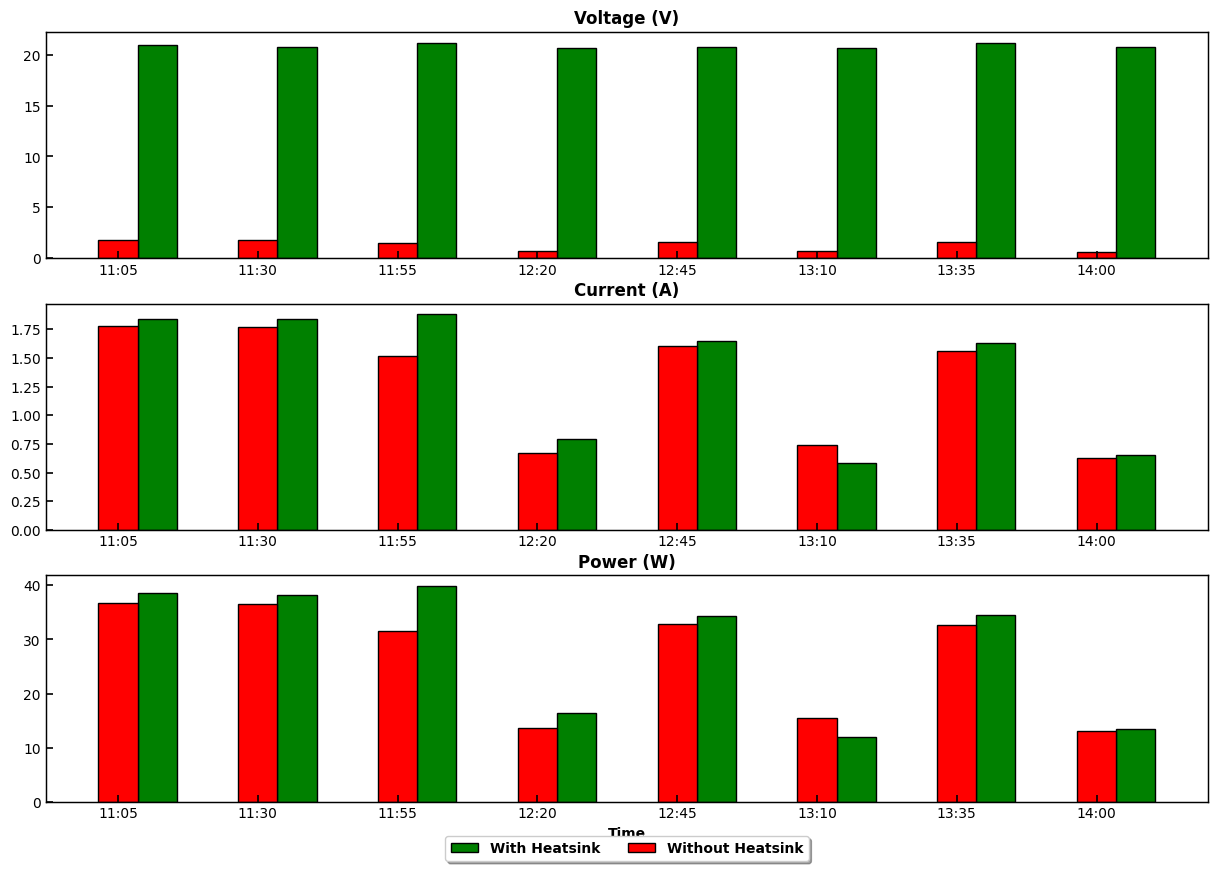

In [28]:
fig, ax = plt.subplots(3,1, figsize=(15,10))



hop = 5
time = [i.strftime('%H:%M') for i in df_voc_isc_heatsink["Time"].to_list() ][::hop]
x = np.linspace(0, 5, len(time))
voc = df_voc_isc_heatsink['Voc'][::hop]
voc_nh = df_voc_isc_no_heatsink['Isc'][::hop]
power = df_voc_isc_heatsink['Watt'][::hop]
power_nh = df_voc_isc_no_heatsink['Watt'][::hop]
isc = df_voc_isc_heatsink['Isc'][::hop]
isc_nh = df_voc_isc_no_heatsink['Isc'][::hop]


ax[0].bar(x+0.2    , voc       , width=0.2, label='With Heatsink' , color='g', edgecolor='k')
ax[0].bar(x        , voc_nh    , width=0.2, label='Without Heatsink' , color='r', edgecolor='k')
ax[0].set_title("Voltage (V)", fontdict={'family':'helvetica', 'fontsize':'12', 'weight':'bold'})

ax[1].bar(x+0.2    , isc       , width=0.2, label='With Heatsink' , color='g', edgecolor='k')
ax[1].bar(x        , isc_nh    , width=0.2, label='Without Heatsink' , color='r', edgecolor='k')
ax[1].set_title("Current (A)", fontdict={'family':'helvetica', 'fontsize':'12', 'weight':'bold'})

ax[2].bar(x+0.2    , power       , width=0.2, label='With Heatsink' , color='g', edgecolor='k')
ax[2].bar(x        , power_nh    , width=0.2, label='Without Heatsink' , color='r', edgecolor='k')
ax[2].set_title("Power (W)", fontdict={'family':'helvetica', 'fontsize':'12', 'weight':'bold'})

for i in range(0,3):
    ax[i].xaxis.set_tick_params(width=1.2, length=5, direction="in")
    ax[i].yaxis.set_tick_params(width=1.2, length=5, direction="in")
    ax[i].xaxis.set_tick_params(width=0.5,direction="in", which='minor')
    ax[i].yaxis.set_tick_params(width=0.5,direction="in", which='minor')
    ax[i].set_xticks(x, time)
ax[2].set_xlabel("Time",fontsize=10, fontdict={'family':'helvetica', 'fontsize':'12', 'weight':'bold'})

ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True, ncol=5, markerscale=1.2, fontsize=14, prop={'family':'helvetica', 'weight':'bold'})

In [29]:
df_normal = pd.read_excel('./dwi.xlsx')
df_normal

,Trata rata lutron,T1,Trata rata lutron .1,T2,Trata rata lutron .2,T3,Trata rata lutron .3,T4,Trata rata lutron .4,T5,Trata rata lutron .5,T6,Trata rata lutron .6,T7,Trata rata lutron .7,T8,Trata rata lutron .8,T9,Trata rata lutron .9,T10
0,59.08,66.72,59.08,67.56,59.08,65.19,59.08,64.94,59.08,61.79,59.08,65.16,59.08,64.49,59.08,62.17,59.08,65.75,59.08,61.19
1,58.25,66.59,58.25,67.23,58.25,65.07,58.25,64.82,58.25,61.27,58.25,64.86,58.25,64.62,58.25,62.17,58.25,65.64,58.25,61.06
2,54.23,66.44,54.23,67.00,54.23,64.98,54.23,64.75,54.23,60.68,54.23,64.52,54.23,64.61,54.23,62.41,54.23,65.55,54.23,60.89
3,51.93,66.29,51.93,67.07,51.93,64.96,51.93,64.82,51.93,60.55,51.93,64.35,51.93,64.39,51.93,62.48,51.93,65.36,51.93,60.80
4,53.03,66.03,52.33,66.79,52.33,64.81,52.33,64.67,52.33,59.32,52.33,64.27,52.33,64.39,52.33,62.58,52.33,65.35,52.33,60.68
5,52.33,66.23,51.73,66.82,51.73,64.63,51.73,64.48,51.73,58.95,51.73,64.22,51.73,64.34,51.73,62.44,51.73,65.38,51.73,60.72
6,52.33,65.69,53.03,66.75,53.03,64.60,53.03,64.39,53.03,58.28,53.03,63.90,53.03,64.35,53.03,62.48,53.03,65.19,53.03,60.80
7,52.28,65.79,51.95,66.39,51.95,64.27,51.95,64.13,51.95,57.74,51.95,63.84,51.95,64.14,51.95,62.33,51.95,65.10,51.95,60.59
8,51.95,65.98,52.28,66.41,52.28,64.14,52.28,64.17,52.28,57.58,52.28,63.88,52.28,64.03,52.28,62.44,52.28,64.90,52.28,60.70
9,51.73,66.16,52.33,66.04,52.33,64.09,52.33,64.00,52.33,57.61,52.33,63.71,52.33,63.92,52.33,62.23,52.33,64.91,52.33,60.55


Text(0, 0.5, 'Frequency')

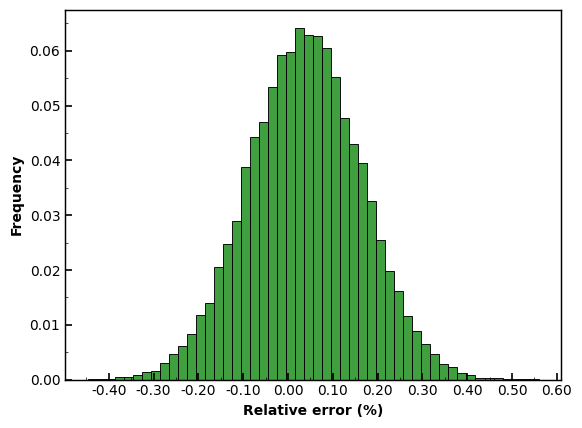

In [30]:

mu = 0.0374
sigma =  0.1258
# x = np.random.normal(loc=mu, scale=sigma, size=1000)
x = np.random.randn(20000)
x = np.sort(mu + sigma * x)

fig, ax = plt.subplots()
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.005))

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter('{x:.2f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

ax.xaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.yaxis.set_tick_params(width=1.2, length=5, direction="in")

ax.xaxis.set_tick_params(width=0.5,direction="in", which='minor')
ax.yaxis.set_tick_params(width=0.5,direction="in", which='minor')


sns.histplot(data=x, stat='probability', bins=50, ax=ax, color='g', edgecolor='k')


ax.set_xlabel("Relative error (%)", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})
ax.set_ylabel("Frequency", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})

In [31]:
import re
a = "25.44 ± 0.11	25.52 ± 0.11	25.26 ± 0.13	25.18 ± 0.12	25.58 ± 0.15	23.24 ± 2.48	26.38 ± 0.69	25.49 ± 0.11	25.99 ± 2.59	25.41 ± 0.13"
pattern = r'(\d+\.\d+)\s?±\s?(\d+\.\d+)'

# Use re.findall to find all matching patterns in the input string
matches = re.findall(pattern, a)

# Extract uncertainties from the matches
uncertainties = [float(match[1]) for match in matches]

# Print the uncertainties
print(uncertainties)
print(sum(uncertainties)/len(uncertainties))

[0.11, 0.11, 0.13, 0.12, 0.15, 2.48, 0.69, 0.11, 2.59, 0.13]
0.662


36
36
min : 36.0 | max : 38.0 | mean : 37.201512309110065


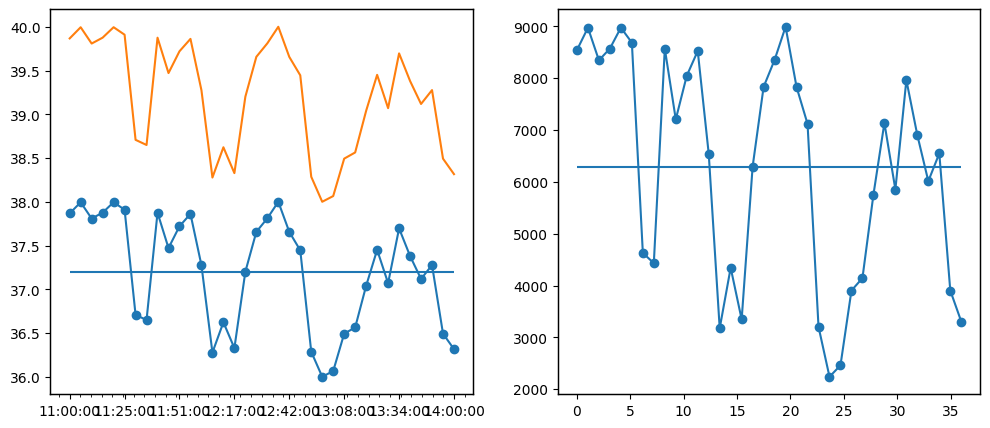

In [32]:
df_lux = pd.read_csv('./lux~waktu.txt', delimiter='\t')
start_time = datetime.time(11, 0)
end_time = datetime.time(14, 0)

# Calculate the time step between data points
time_step = (datetime.datetime.combine(datetime.date(1, 1, 1), end_time) - datetime.datetime.combine(datetime.date(1, 1, 1), start_time)) / 35

# Create a list of timestamps with only the hour and minute
timestamps = [time.strftime('%H:%M') for time in [(datetime.datetime.combine(datetime.date(1, 1, 1), start_time) + i * time_step) for i in range(36)]]

# Create a Pandas DataFrame with the timestamp column
df = pd.DataFrame({'Timestamp': timestamps})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%H:%M").dt.time
df_lux["time"] = df['Timestamp']
df_lux["luxs"] = df_lux["luxs"].astype(float)
df_lux

fig, ax = plt.subplots(1,2 ,figsize=(12,5))
ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[0].xaxis.set_major_formatter('{x:.2f}')
ax[0].xaxis.set_minor_locator(MultipleLocator(1))



temp = []
for data in df_lux.luxs:
    temp.append(36 + (38 - 36) * (data - df_lux.luxs.min()) / (df_lux.luxs.max() - df_lux.luxs.min()))

temp = np.array(temp)
print(len(temp))
print(len(x))

ax[0].hlines(temp.mean(), x.min(), x.max())
ax[0].plot(x, temp)
ax[0].plot(x, temp + 2)
ax[0].scatter(x, temp)
x = np.linspace(0, len(df_lux.time), len(df_lux.time))
ax[0].set_xticks(x[::5], df_lux['time'][::5])

ax[1].hlines(df_lux.luxs.mean(), x.min(), x.max())
ax[1].plot(x, df_lux.luxs)
ax[1].scatter(x, df_lux.luxs)

print(f"min : {temp.min()} | max : {temp.max()} | mean : {temp.mean()}")

In [33]:
pd.DataFrame({'time':df_lux.time, 'lux':temp}).to_excel("data_rescaled.xlsx")

Text(0.5, 0, 'Time')

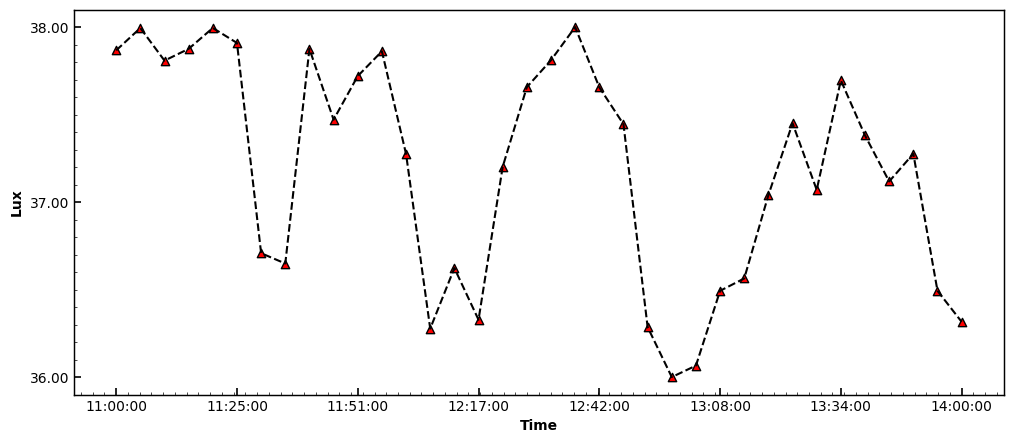

In [34]:
fig, ax = plt.subplots(figsize=(12,5))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.2f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.5))


ax.xaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.yaxis.set_tick_params(width=1.2, length=5, direction="in")

ax.xaxis.set_tick_params(width=0.5,direction="in", which='minor')
ax.yaxis.set_tick_params(width=0.5,direction="in", which='minor')

ax.plot(x, temp, color='k', linestyle='--')
ax.scatter(x, temp, marker='^', color='r', edgecolors='k')
ax.set_xticks(x[::5], df_lux['time'][::5])


matplotlib.rcParams['axes.linewidth'] = 1.05
ax.spines[['right', 'top']].set_visible(True)

ax.set_ylabel("Lux", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})
ax.set_xlabel("Time", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})

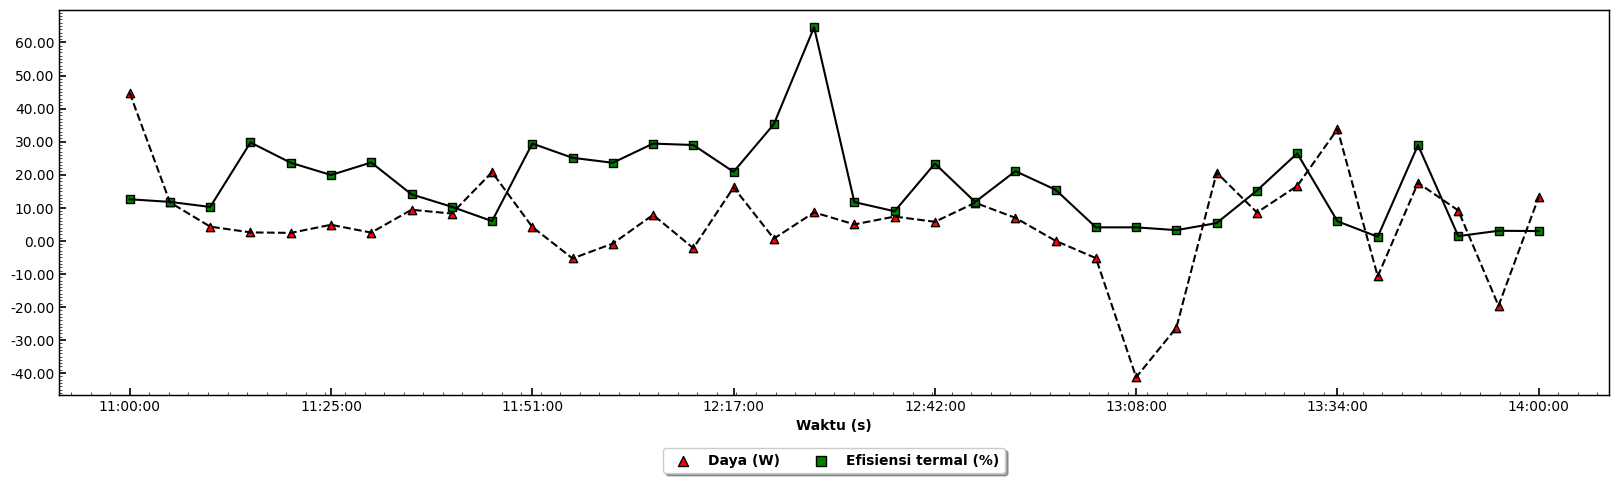

In [46]:
df_efisiensi_termal = pd.read_csv('./efisiensi termal.dat', header=None, delimiter='\t')
df_power_over_time = pd.read_csv('./kenaikan power terhadap waktu.dat', header=None, delimiter='\t')
start_time = datetime.time(11, 0)
end_time = datetime.time(14, 0)

df_power_over_time[0] = df['Timestamp']
df_power_over_time

fig, ax = plt.subplots(figsize=(20,5))

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.2f}')
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

ax.xaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.yaxis.set_tick_params(width=1.2, length=5, direction="in")
ax.xaxis.set_tick_params(width=0.5,direction="in", which='minor')
ax.yaxis.set_tick_params(width=0.5,direction="in", which='minor')



ax.plot(x, df_power_over_time[1], color='k', linestyle='--')
ax.scatter(x, df_power_over_time[1], marker='^', color='r', edgecolors='k', label="Persentasi Daya (%)")
ax.plot(x, df_efisiensi_termal[1], color='k')
ax.scatter(x, df_efisiensi_termal[1], marker='s', color='g', edgecolors='k', label="Efisiensi Termal (%)")
#ax[1].set_tittle("Lux", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})


ax.set_xticks(x[::5], df['Timestamp'][::5])
ax.set_xlabel("Waktu (s)", fontdict={'family':'helvetica', 'fontsize':'10', 'weight':'bold'})
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True, ncol=5, markerscale=1.2, fontsize=14, prop={'family':'helvetica', 'weight':'bold'})